In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scikitplot as skplt

#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

# 2. Data Collection and Understanding 

## Network file

The network.csv file contains a static picture of the gas pipeline network. Every row corresponds to a pipe and has a unique PipeId identifier. The table has 1.446.529 pipes. 

The columns describe relevant features of each pipe. The complete list is: 

PipeId - unique identifier for the pipe 

Province - Spanish province where the pipe is located 

Town - Town or city where the pipe is located 

YearBuilt - Year in which the pipe was built and installed 

Material - Material in which the pipe is built 

GasType - Type of gas that runs through the pipe 

Diameter - diameter of the pipe 

Length - Length of the pipe 

Pressure - Pressure of the gas that runs through the pipe (bar) 

NumConnections - Number of connections (external). 

NumConnectionsUnder - Number of connections (internal and buried) 

BoolBridle  - Whether the pipe is bridled (True) or welded (False) 

## Inspection file

MaintenanceId - unique identifier for the inspection operation 

InspectionYear - year in which the inspection took place 

InspectionDate - date in which the inspection took place 

MonthsLastRev - number of months elapsed since the last previous inspection. 

Severity - Severity of the damage found (1: most severe, 3: least severe) 

Incidence - Boolean whether an incident was found on the revision (1) or not (0). 

In [2]:
# Loading inspection data
df_inspection = pd.read_csv('inspections.csv')

# Loading network data
df_network = pd.read_csv('network.csv')

In [3]:
#merge both dataframes

df_combined = pd.merge(df_inspection, df_network, on="PipeId")

In [4]:
df_combined.head()

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.0,0,0,False
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.0,0,0,False
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.0,0,0,False
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.0,0,0,False
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.0,0,0,False


In [7]:
df_combined.to_csv('df_pipes_combined.csv', index = False)

In [8]:
df_combined['BoolBridle'].describe()

count     6345344
unique          2
top         False
freq      5967747
Name: BoolBridle, dtype: object

In [9]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

In [10]:
dataset_description(df_combined)

This is the Dataset shape: (6345344, 18)

Dataset columns: Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Severity', 'Incidence', 'Province', 'Town',
       'YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle'],
      dtype='object')


Columns description:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345344 entries, 0 to 6345343
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PipeId               int64  
 1   MaintenanceId        object 
 2   InspectionYear       int64  
 3   InspectionDate       object 
 4   MonthsLastRev        int64  
 5   Severity             int64  
 6   Incidence            int64  
 7   Province             object 
 8   Town                 object 
 9   YearBuilt            int64  
 10  Material             object 
 11  GasType              object 
 12  Diameter             f

None

,PipeId,InspectionYear,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder
count,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06,6.345344e+06
mean,2.031281e+08,2.015609e+03,2.349061e+01,3.997426e+00,1.942842e-03,2.001037e+03,1.195482e+02,3.653018e+01,2.906349e+00,9.842453e-01,2.229982e-04
std,1.137699e+08,2.909342e+00,4.961511e+00,6.451558e-02,4.403484e-02,1.196869e+01,5.721421e+01,7.214106e+01,6.572514e+00,2.140921e+00,1.613866e-02
min,4.896160e+05,2.010000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.901000e+03,1.000000e+01,0.000000e+00,2.500000e-02,0.000000e+00,0.000000e+00
25%,1.335933e+08,2.013000e+03,2.300000e+01,4.000000e+00,0.000000e+00,1.997000e+03,9.000000e+01,4.005000e+00,1.000000e-01,0.000000e+00,0.000000e+00
50%,1.903213e+08,2.016000e+03,2.400000e+01,4.000000e+00,0.000000e+00,2.003000e+03,1.100000e+02,1.426200e+01,1.500000e-01,0.000000e+00,0.000000e+00
75%,2.981763e+08,2.018000e+03,2.400000e+01,4.000000e+00,0.000000e+00,2.008000e+03,1.600000e+02,4.460100e+01,4.000000e+00,1.000000e+00,0.000000e+00
max,4.519953e+08,2.021000e+03,1.320000e+02,4.000000e+00,1.000000e+00,2.050000e+03,6.096000e+02,2.610094e+04,8.000000e+01,8.800000e+01,4.000000e+00



Null values:



PipeId                 0
MaintenanceId          0
InspectionYear         0
InspectionDate         0
MonthsLastRev          0
Severity               0
Incidence              0
Province               0
Town                   0
YearBuilt              0
Material               0
GasType                0
Diameter               0
Length                 0
Pressure               0
NumConnections         0
NumConnectionsUnder    0
BoolBridle             0
dtype: int64

In [11]:
# Converting Boolbride into categorical boolean variable
def boolbridle(x):
    return 1 if x == 'True' else 0

In [13]:
# Apply function on dataset
df_combined['BoolBridle'] = df_combined['BoolBridle'].apply(lambda x: boolbridle(x))

In [48]:
df_combined

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,weekday
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2010-10-01
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2012-10-01
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2014-10-08
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2016-10-14
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,0,2020-12-31
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,0,2020-12-31
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,0,2020-12-31
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,0,2020-12-31


In [49]:
df_combined['day_of_week'] = df_combined['weekday'].dt.day_name()

In [50]:
df_combined

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,weekday,day_of_week
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2010-10-01,Friday
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2012-10-01,Monday
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2014-10-08,Wednesday
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2016-10-14,Friday
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,0,2018-10-09,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,0,2020-12-31,Thursday
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,0,2020-12-31,Thursday
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,0,2020-12-31,Thursday
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,0,2020-12-31,Thursday


In [15]:
print (df_combined['GasType'].unique())

['Gas natural' 'Gas propano']


In [16]:
print (df_combined['Material'].unique())

['PE' 'AO' 'FD' 'FG' 'PN' 'PA' 'FO' 'FI' 'CU' 'PV' 'ZD']


In [35]:
df_combined['Incidence'].value_counts()

0    6333016
1      12328
Name: Incidence, dtype: int64

In [ ]:
df_combined['Incidence'].value_counts()

In [34]:
df_combined['Material'].value_counts()

PE    5547707
AO     535129
FD     223574
PN      20541
CU      13705
ZD       4502
FG         84
FI         73
PA         13
PV         12
FO          4
Name: Material, dtype: int64

<AxesSubplot:xlabel='Material', ylabel='count'>

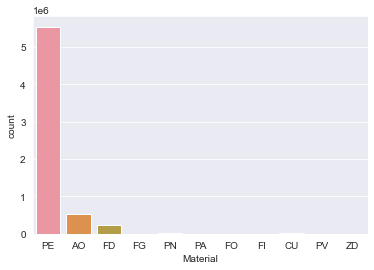

In [53]:
sns.countplot(df_combined['Material'])

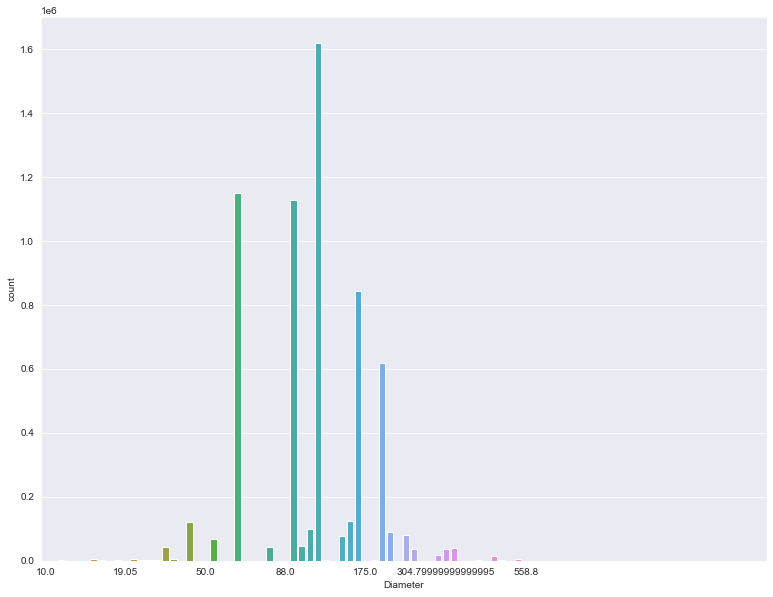

In [56]:
f, ax = plt.subplots(figsize=(13,10))
sns.countplot(df_combined['Diameter'])
ax.set_xticks(np.arange(0,100,10))

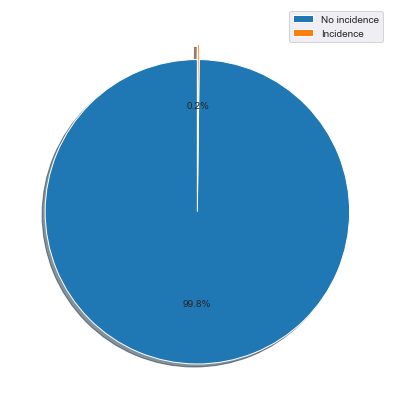

In [59]:
#The following graph shows the percentage of incidence per inspection
fig = plt.figure(figsize =(10, 7))
explode = (0.1 , 0.0)
plt.pie(df_combined.Incidence.value_counts(normalize=True),explode = explode, autopct='%1.1f%%',shadow = True,startangle=90)
plt.legend(['No incidence', 'Incidence'])
# show plot
plt.show()

In [66]:
#General number of inspection per year 
df_combined[['Incidence','InspectionYear']].groupby(['InspectionYear']).count()

,Incidence
InspectionYear,
2010,93518
2011,528113
2012,611594
2013,581559
2014,593223
2015,617187
2016,627667
2017,684715
2018,654861


In [ ]:
#General number of inspection per year 
df_combined[['Incidence','InspectionYear']].groupby(['da']).count()

# Univariate analysis

In [41]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(40, 30))

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

    # Plotting the variable with every information
        plt.subplot(1, size, j+1)
        ax = sns.barplot(norm_count, norm_count.index, order=norm_count.index)
        ax.bar_label(ax.containers[0], size=20, fmt='%.2f')
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)

In [43]:
UVA_category(df_combined,'Diameter')

KeyError: 'D'

<Figure size 2880x2160 with 0 Axes>

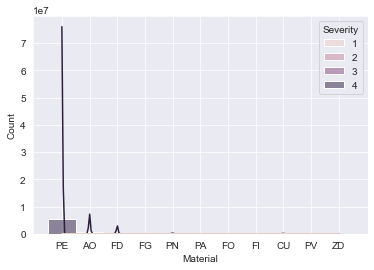

In [23]:
sns.histplot(x='Material', data=df_combined, kde=True, hue='Severity')
 
plt.show()

In [ ]:
# Plotting class Distribution in Training Data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
chart = sns.countplot(x='YearBuilt',data=df_combined, palette="Set2")
plt.xticks(rotation=180)
plt.title('Years')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [51]:
#Function Definition
def BVA_category(data, Target, feature):

    # Using different plots
    fig, ax = plt.subplots(2, 2, figsize=(25, 25))
    fig.tight_layout(h_pad=3, w_pad=3)

    # define subplot titles
    ax1 = ax[0, 0]
    ax[0, 0].set_title('Bar Plot', size = 12)
    ax2 = ax[0, 1]
    ax[0, 1].set_title('Density Plot', size = 12)
    ax3 = ax[1, 0]
    ax[1, 0].set_title('Violin Plot', size = 12)
    ax4 = ax[1, 1]
    ax[1, 1].set_title('Box Plot',size = 12)
    
 

    # add overall title and adjust it so that it doesn't overlap with subplot titles
    plt.subplots_adjust(top=0.95)
    sns.barplot(x = Target, y=feature, data=data, palette="Set2", ax=ax1)
    sns.kdeplot(data=data, x=feature, hue=Target, alpha=0.2,
                fill=True, legend=True, ax=ax2, palette="Set2")
    sns.violinplot(data=data, x = Target, y=feature, linewidth=0.5, palette="Set2", ax=ax3)
    sns.boxplot(data=data, x=Target, y=feature,
                width=0.2, palette="Set2", ax=ax4)
    plt.show()

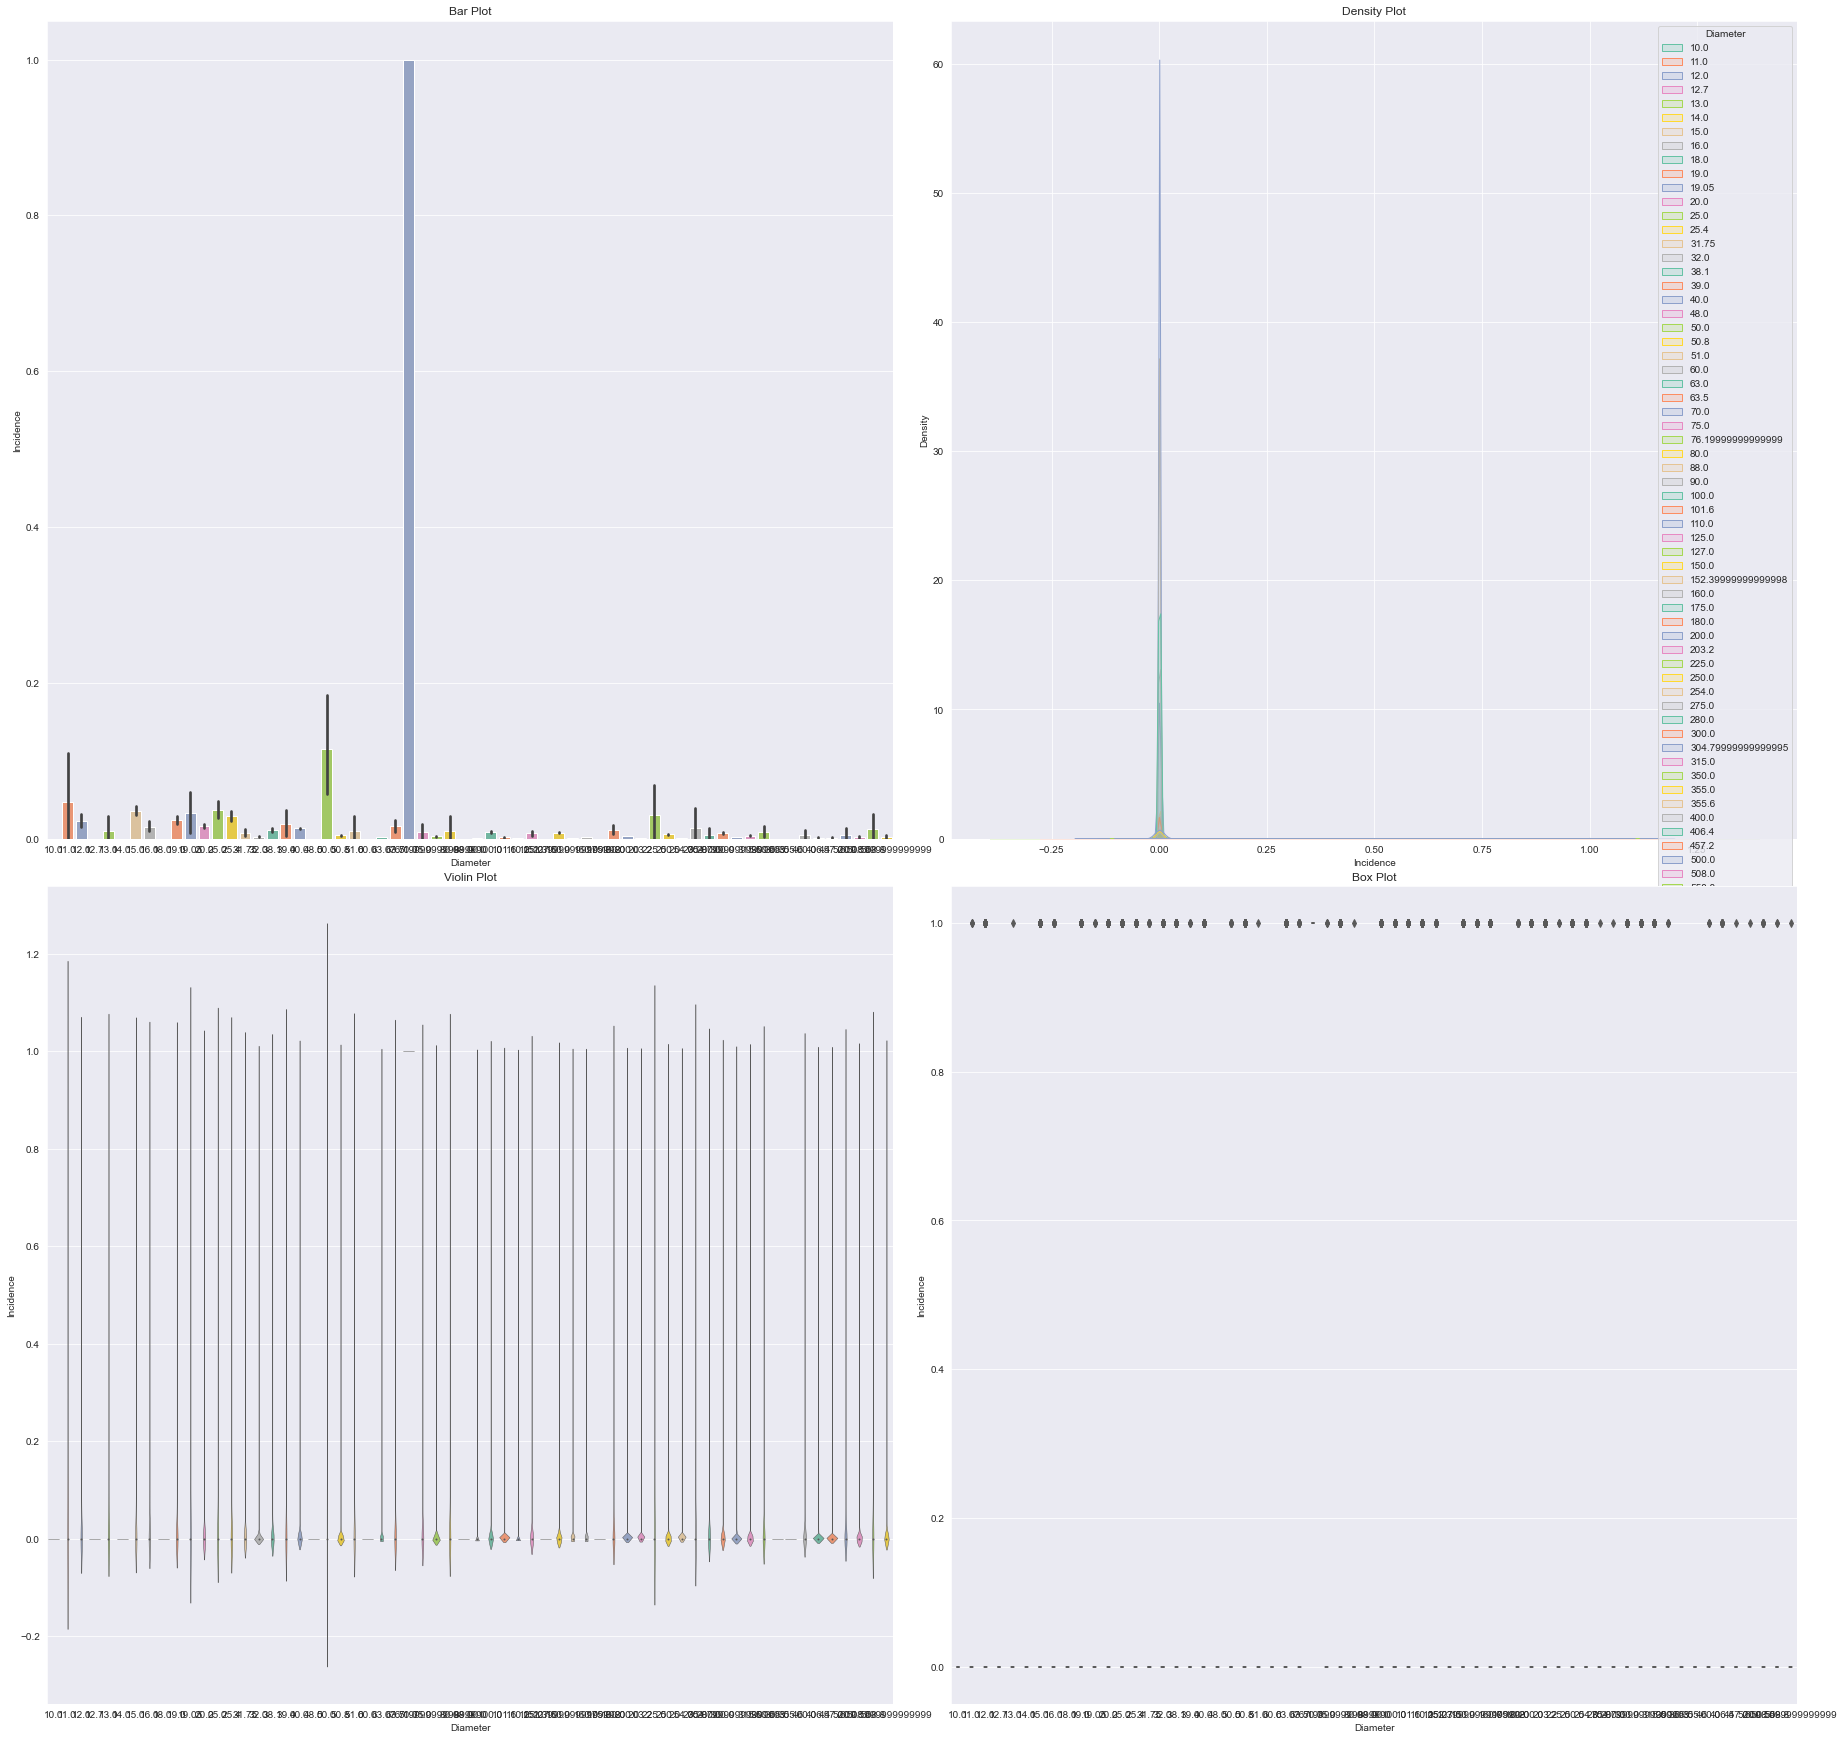

In [52]:
BVA_category(df_combined, 'Diameter', 'Incidence')